## Exploratory Data Analysis on a Dataset

In [52]:

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')


 ## 1.Data Cleaning and Preparation:

 ## Load the dataset into a data frame or equivalent data structure

In [53]:
df=pd.read_csv('Cardiotocographic.csv')
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


## Handle missing values appropriately (e.g., imputation, deletion).

In [55]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [56]:
# Handle missing values appropriately (e.g., imputation, deletion)
missing_value=['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']

for col in missing_value:
    mean=df[col].mean() 
    df[col].fillna(mean,inplace=True)

In [57]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [58]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

 ## Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [59]:
# Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
num_col=df.select_dtypes(['float64','int64']).columns
num_col

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

## Detect and treat outliers if necessary.

In [ ]:
## replacing outliers
def outlier_cappin(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extrem=Q1-1.5*IQR
    upper_extrem=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extrem if x<lower_extrem else upper_extrem if x>upper_extrem else x)


for col in df.select_dtypes(['int','float']).columns:
    outlier_cappin(df,col)

In [62]:
df.reset_index(inplace=True)
df

,index,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.4,64.0,0.999926,1.0
1,1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.1,117.0,1.000000,1.0
4,4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2121,140.000000,0.000000,0.006416,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,0.000000,1.0
2122,2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,1.000000,1.0
2123,2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,1.000000,1.0
2124,2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,1.000000,1.0


In [63]:
df.drop('index',axis=1,inplace=True)
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.4,64.0,0.999926,1.0
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.1,117.0,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006416,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,0.000000,1.0
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,1.000000,1.0
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,1.000000,1.0
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,1.000000,1.0


## 2.Statistical Summary

In [64]:
Statistical_summary=df.describe()
Statistical_summary

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0
mean,133.293725,0.003147,0.001568,0.004362,0.001770,0.0,0.0,46.981873,1.304644,6.691678,8.016212,70.321076,0.319662,1.0
std,9.930227,0.003826,0.002485,0.003001,0.002668,0.0,0.0,17.612745,0.781091,10.378400,5.046784,39.570633,0.621602,0.0
min,105.000000,-0.008409,-0.003850,-0.005177,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.0
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.0
max,161.000000,0.014015,0.006416,0.013564,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000,1.0


## 3.Data Visualization

## Create histograms or boxplots to visualize the distributions of various numerical variables.

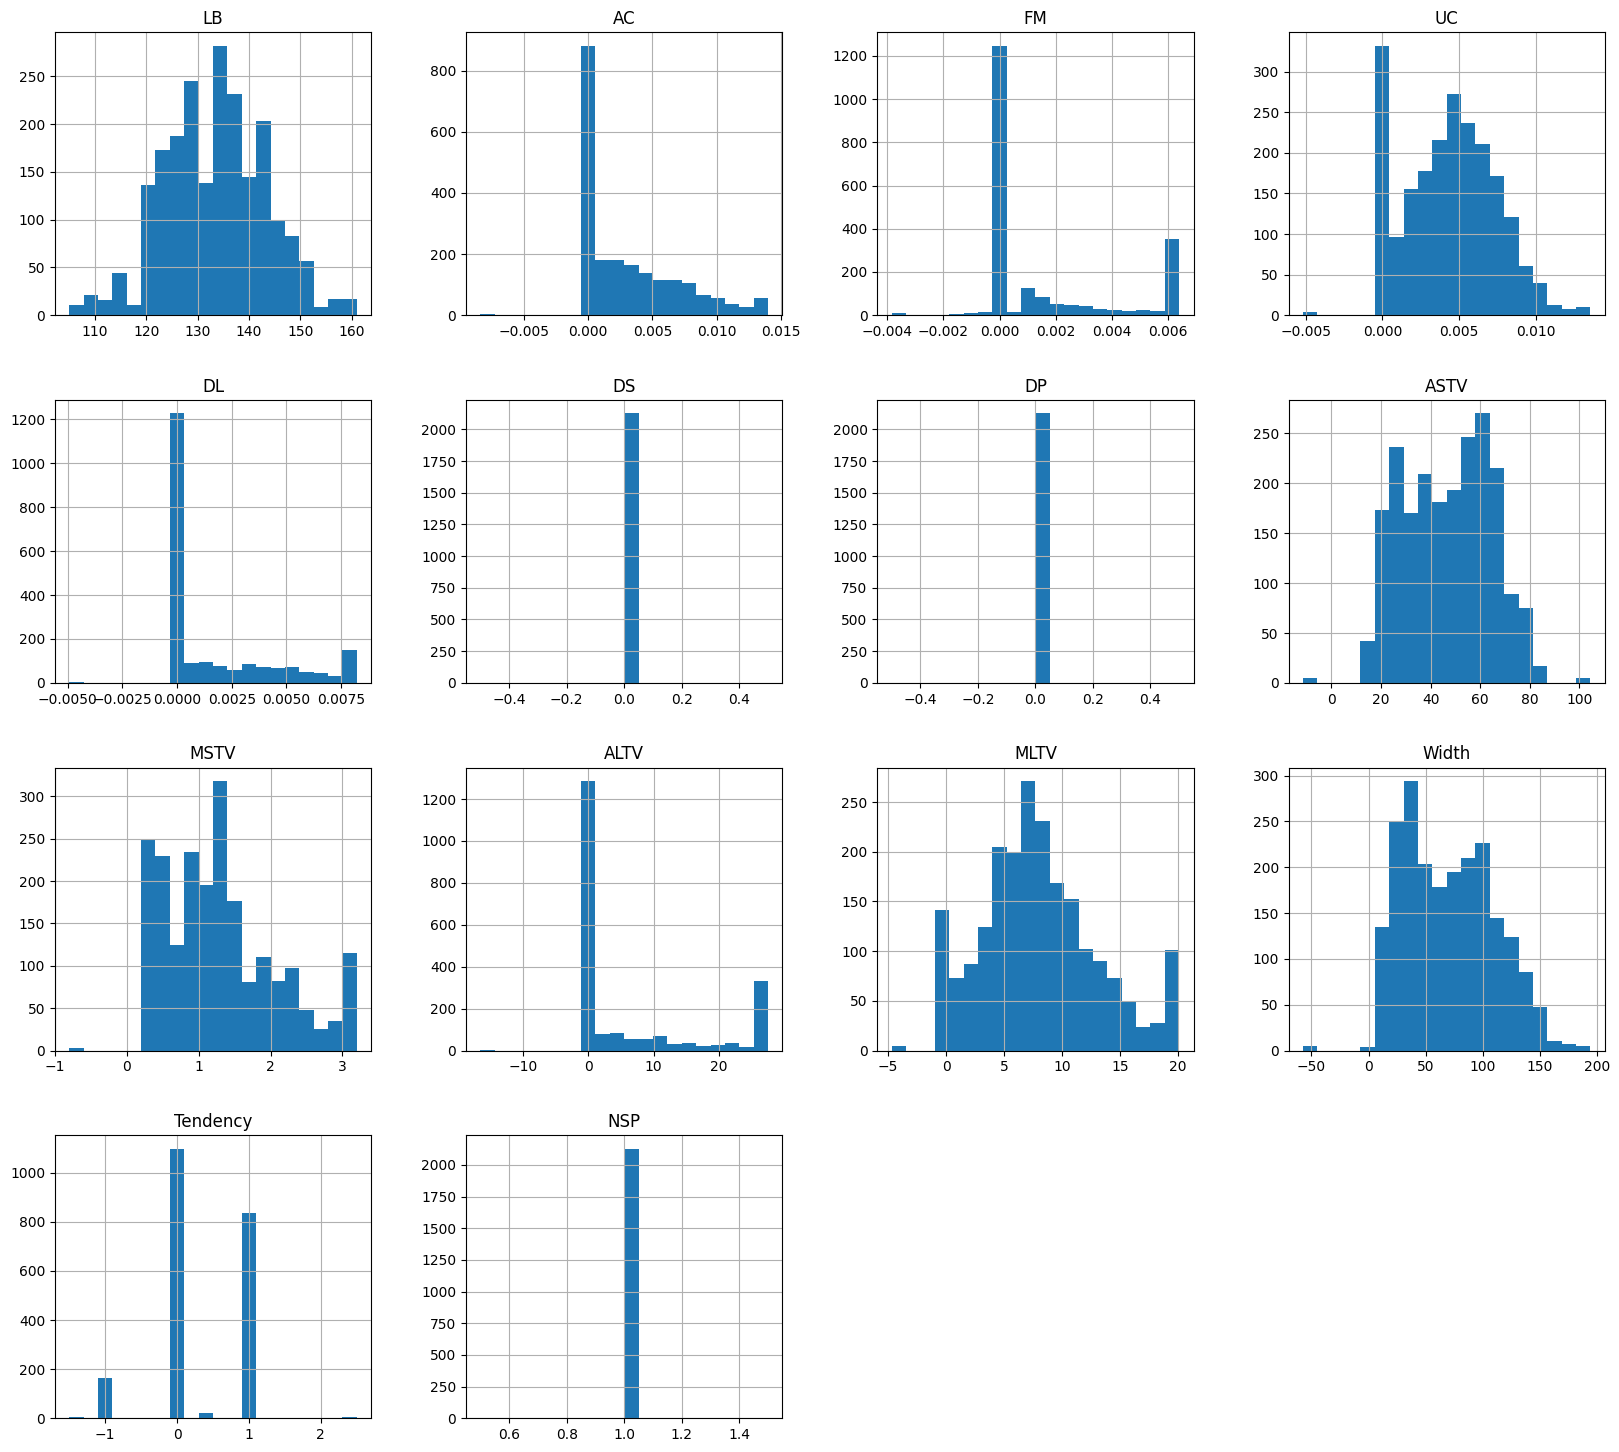

In [65]:
#  histograms 
df.hist(bins=20,figsize=(20,18))
plt.show()

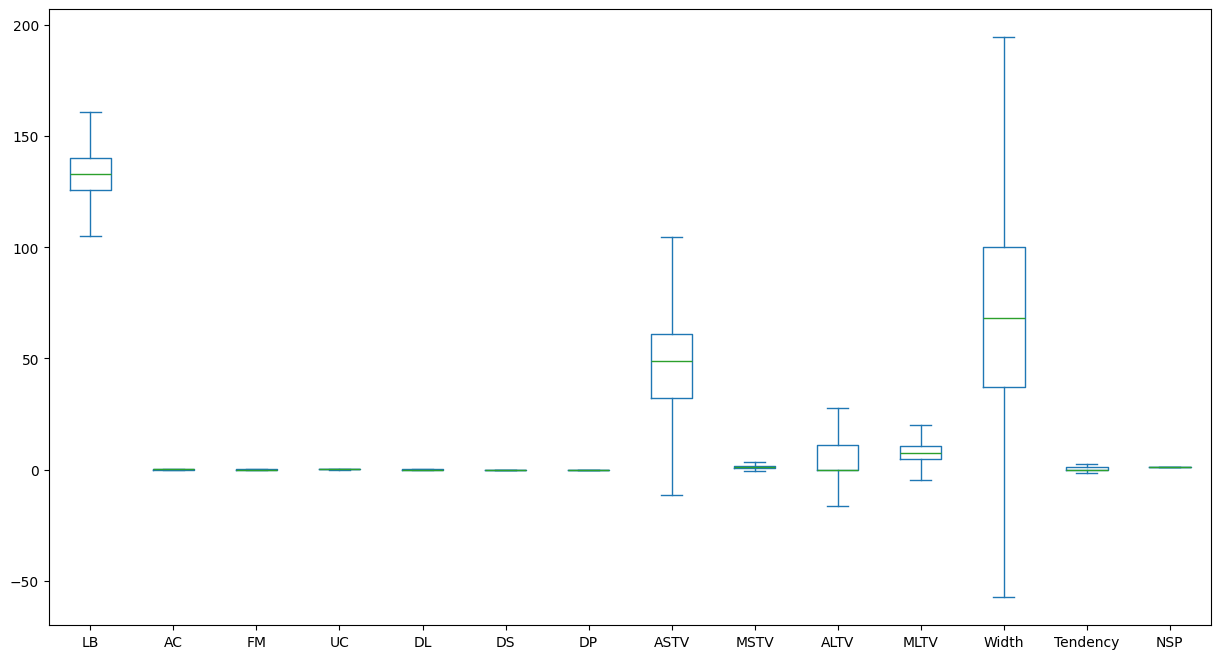

In [66]:
# Box plot
df.plot(kind='box',figsize=(15,8))
plt.show()

In [67]:

cat_col = df.select_dtypes(include=['object', 'category']).columns
cat_col


Index([], dtype='object')

## Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

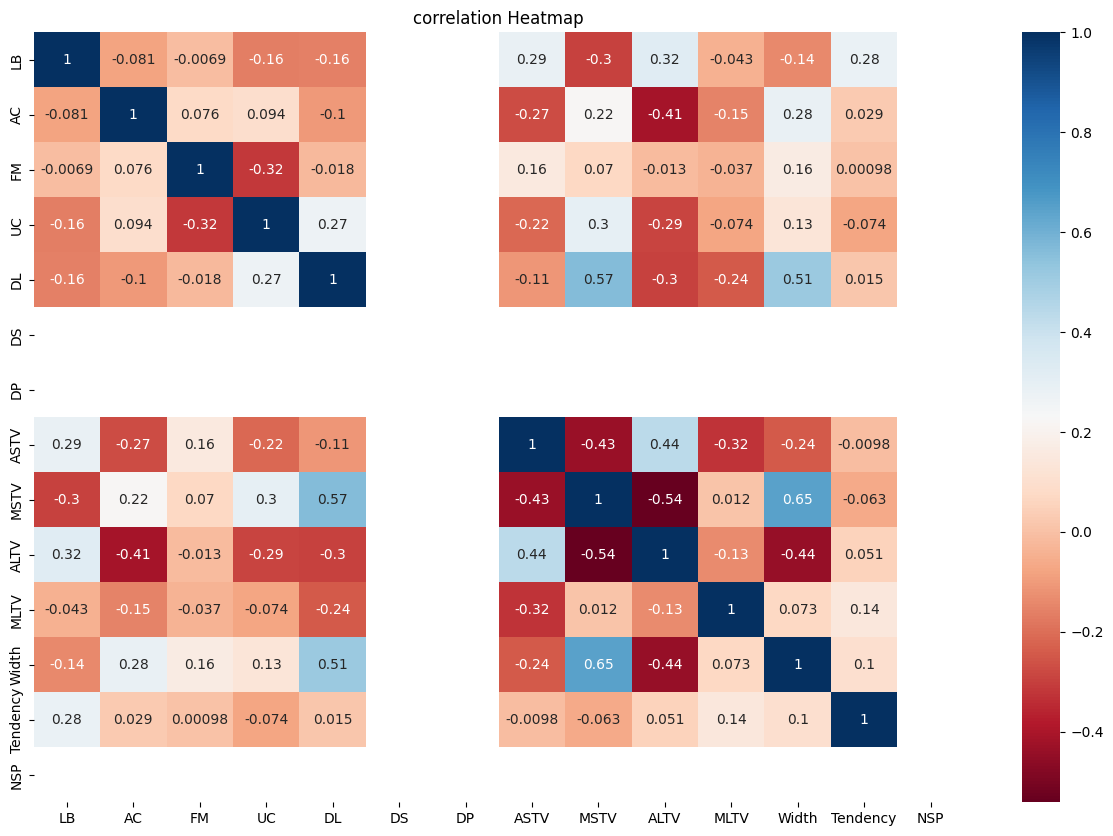

In [ ]:

import seaborn as sns
plt.figure(figsize=(15,10))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu')
plt.title('correlation Heatmap')
plt.show()

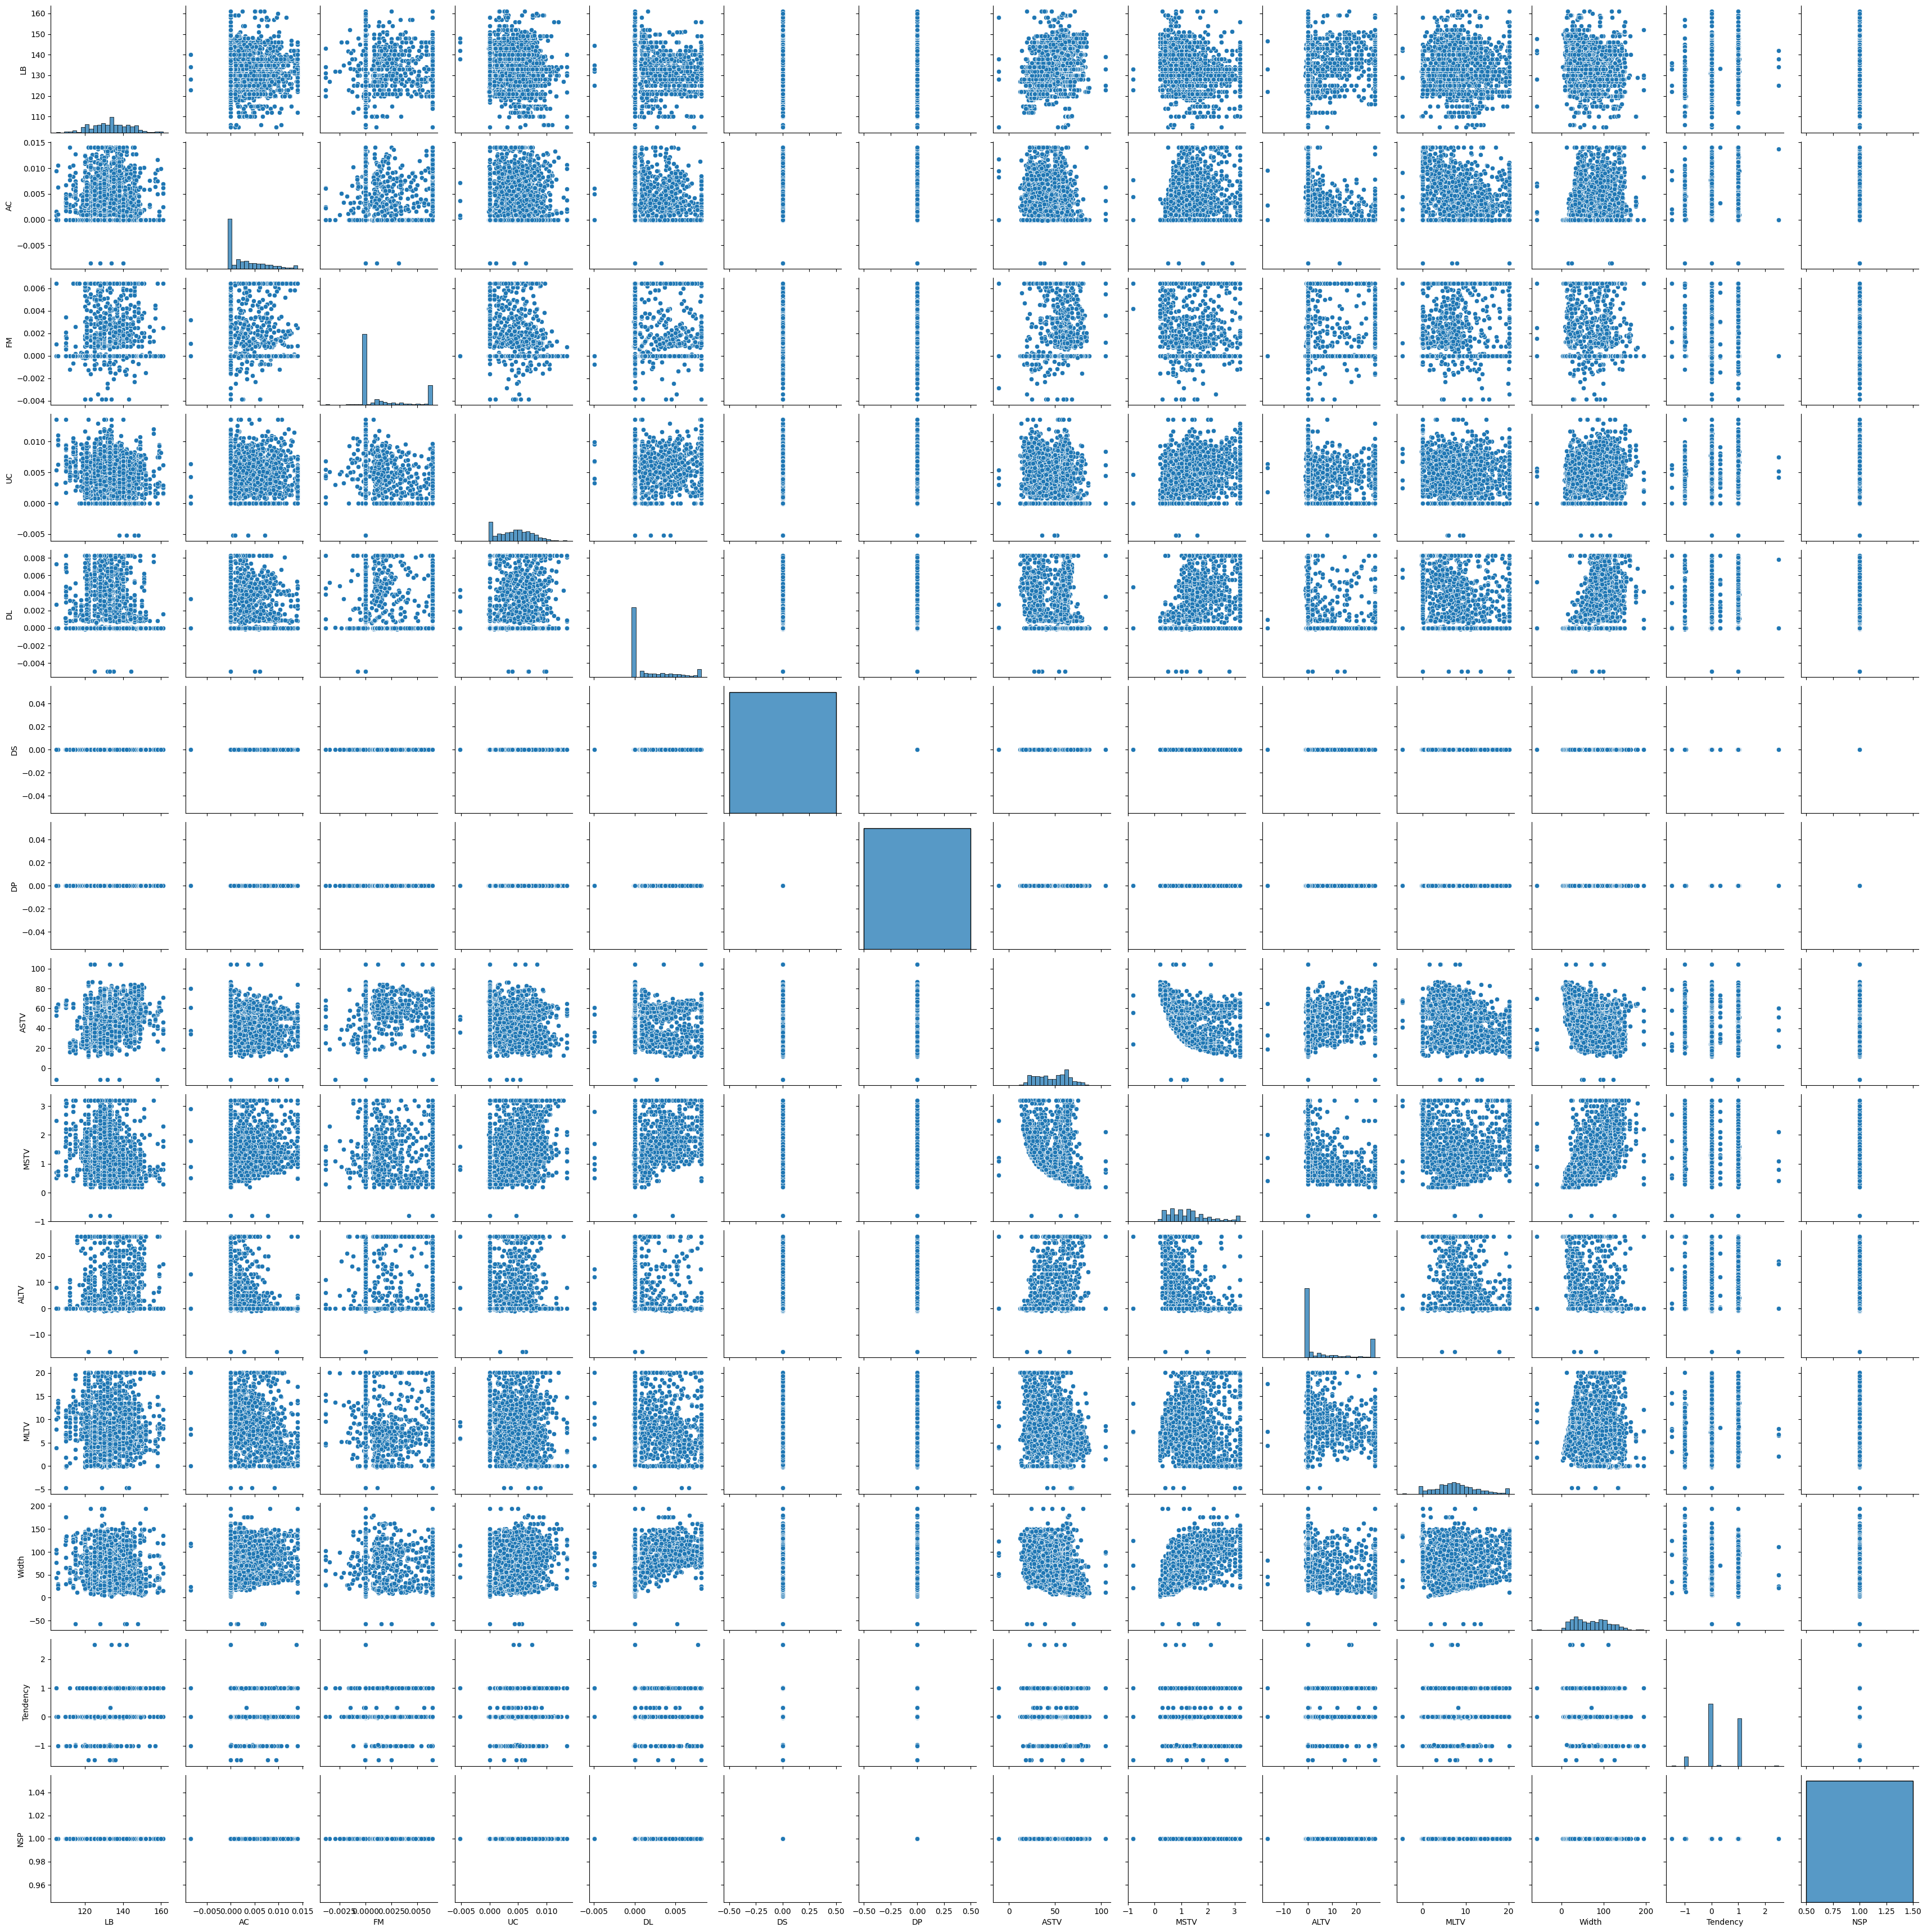

In [69]:
#Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.
sns.pairplot(df)

<Axes: >

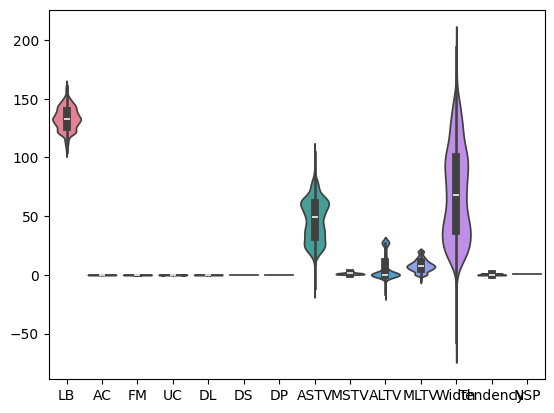

In [70]:
#violin plot
sns.violinplot(df)

## 4.Pattern Recognition and Insights

In [71]:
# dentify any correlations between variables and discuss their potential implications
strong_correlation=correlation_matrix[(correlation_matrix>0.5) & (correlation_matrix<1)]
print('strong correlations:')
strong_correlation

strong correlations:


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.566340,NaN,NaN,0.514648,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSTV,NaN,NaN,NaN,NaN,0.566340,NaN,NaN,NaN,NaN,NaN,NaN,0.646056,NaN,NaN
ALTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5.Conclusion:
- In this EDA process on the given dataset, the null values are replaced with the mean values and outliers are detected using IQR method and deleted.
- By correlation matrix we can know the relation between the variables, corr() is used to get the correlation values it lies between -1 to +1 .
- Heatmap is used to visualize the relation between the variables.

key insights:
- There is no much correlation between the variables in the dataset.
- This finding will help in decision making and model development.